In [1731]:
# import library 
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np
pd.set_option('display.max_columns', 500)

In [1732]:
# load the data to dataframe 
train_data = pd.read_csv('../data/train.csv',index_col =['Id'])

There are 1460 observations in the dataset.
For each observation, there are 80 columns.
The 'SalePrice' column is the response and the rest columns are the feature

In [1733]:
print('Train data shape :', train_data.shape)

Train data shape : (1460, 80)


In [1734]:
print('The are {} columns in the dataset'.format(len(train_data.columns)))
print('The columns of the dataset :')
print(train_data.columns)

The are 80 columns in the dataset
The columns of the dataset :
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'Ga

In [1735]:
print(train_data.dtypes)

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object


In [1736]:
print('The numeric type data columns:')

print(train_data.dtypes[train_data.dtypes != 'object'].index)

print('There are {} columns are numeric data'.format(len(train_data.dtypes[train_data.dtypes != 'object'].index
)))


The numeric type data columns:
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
There are 37 columns are numeric data


/opt/homebrew/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/opt/homebrew/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


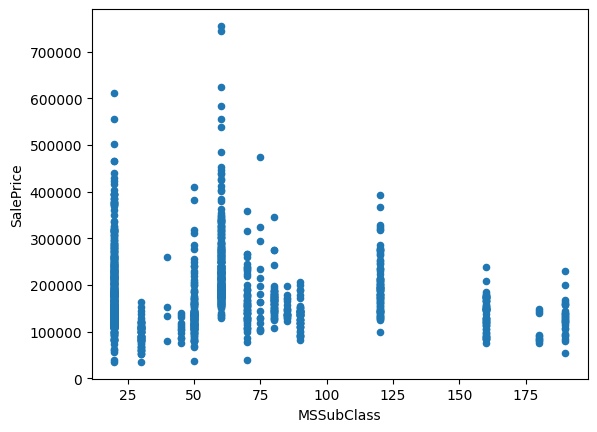

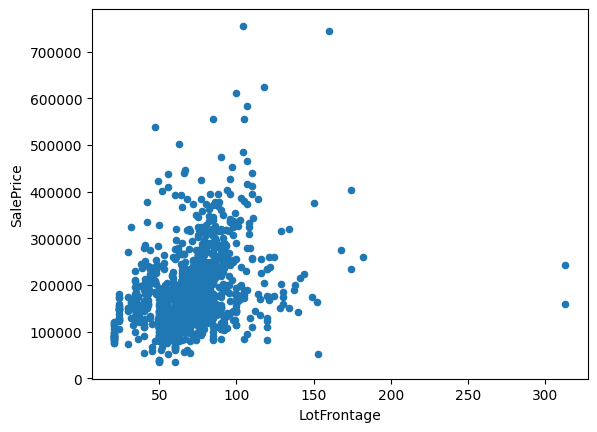

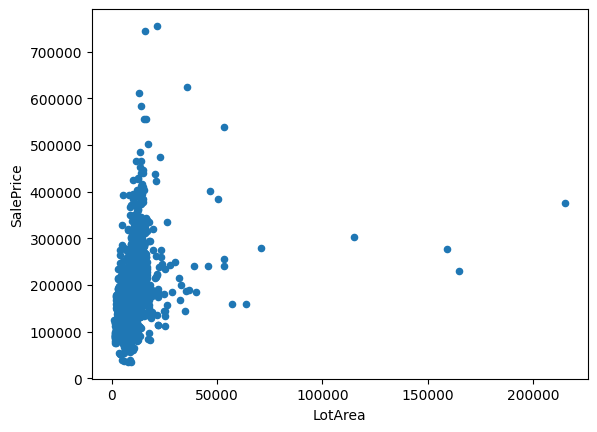

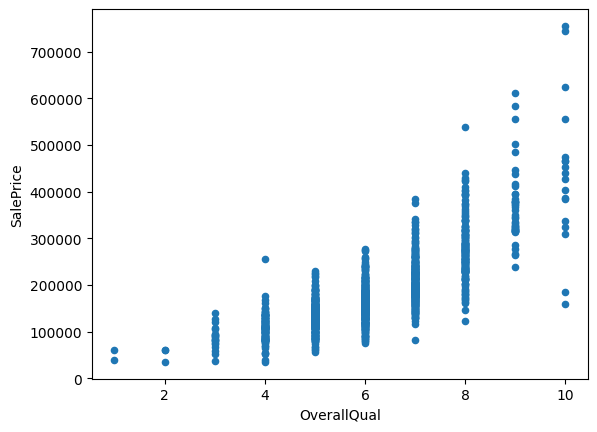

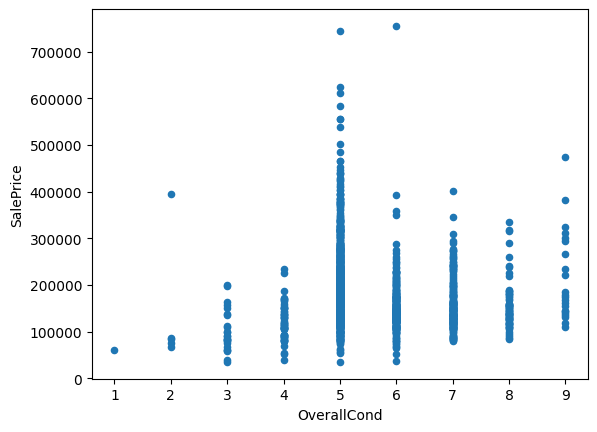

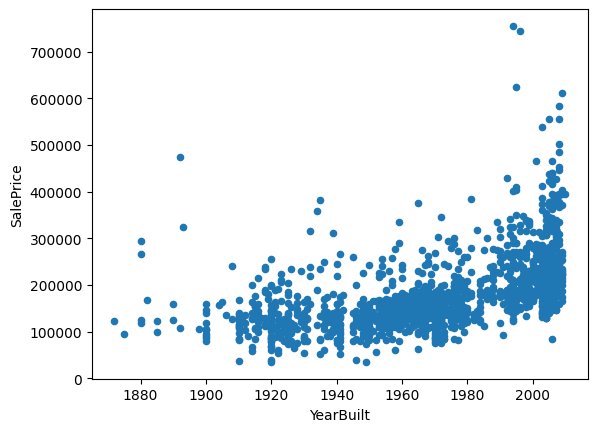

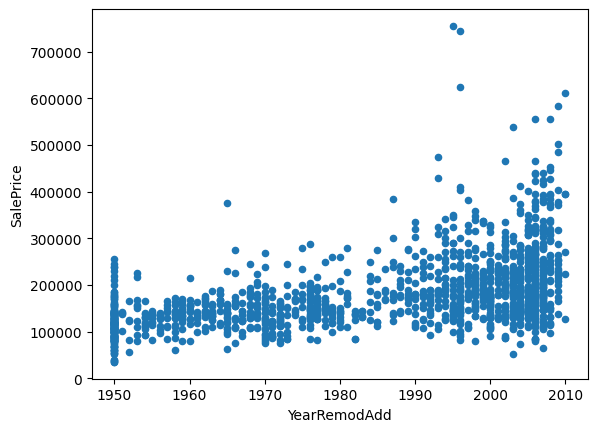

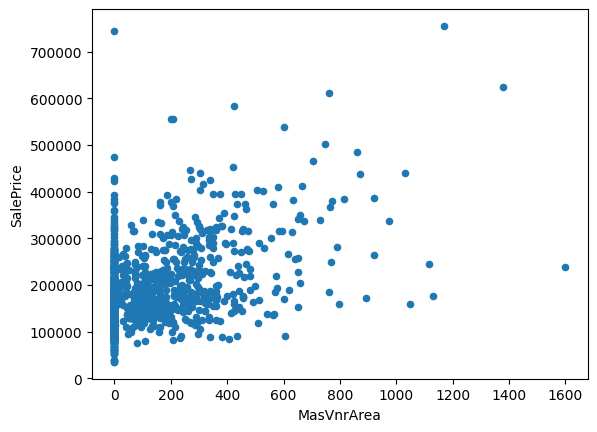

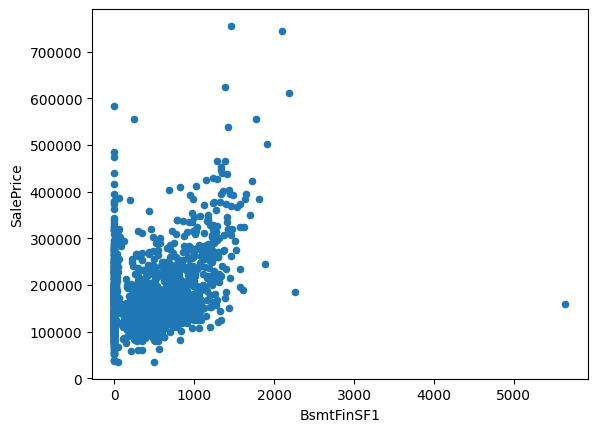

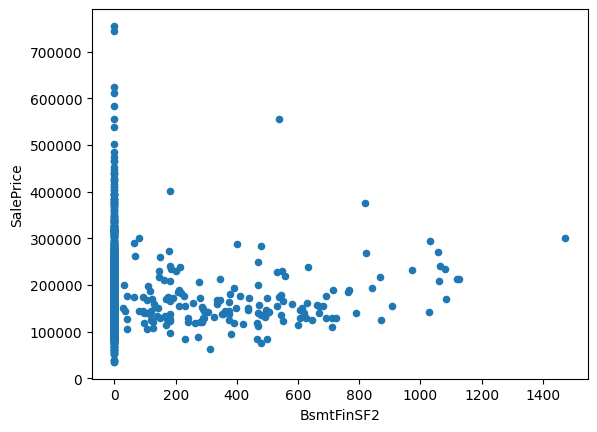

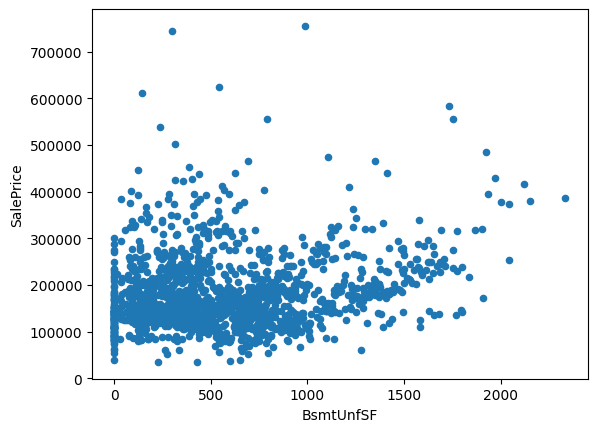

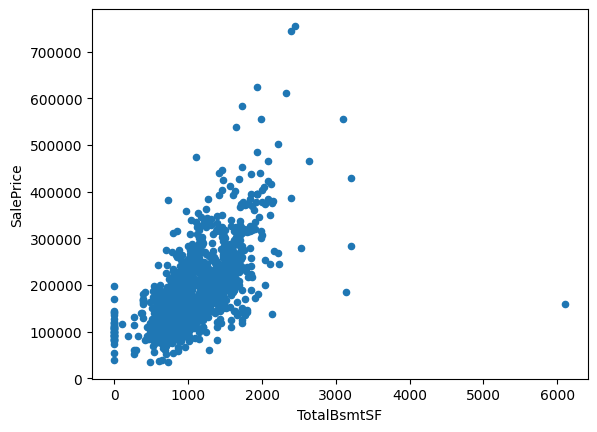

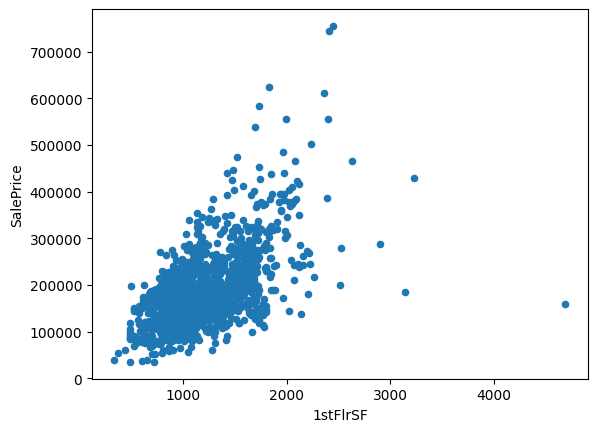

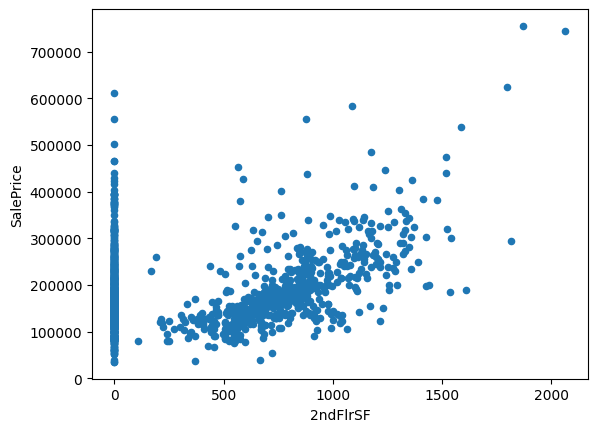

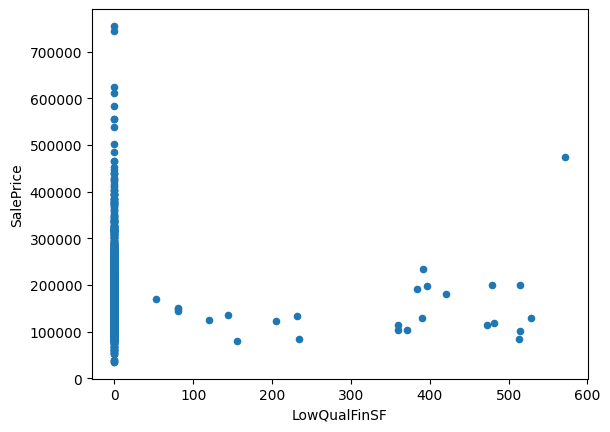

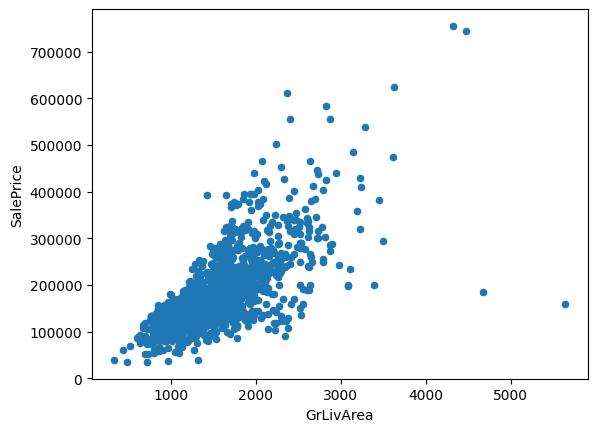

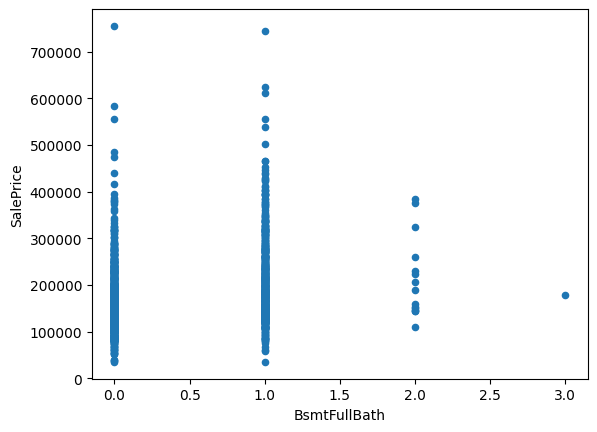

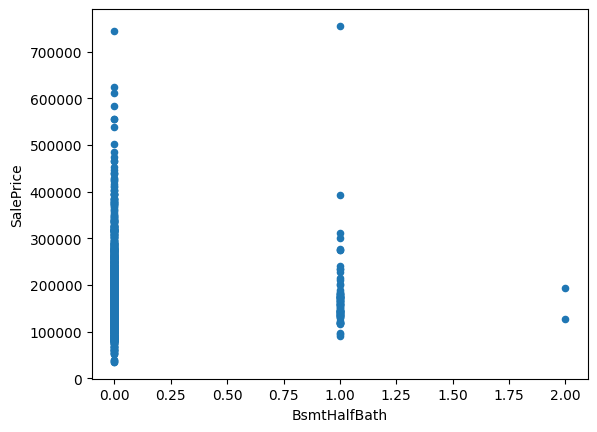

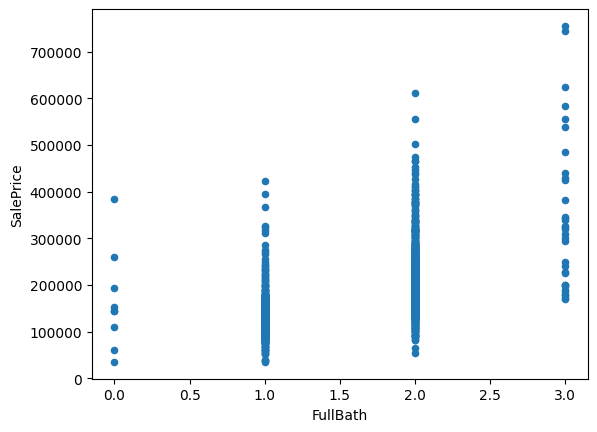

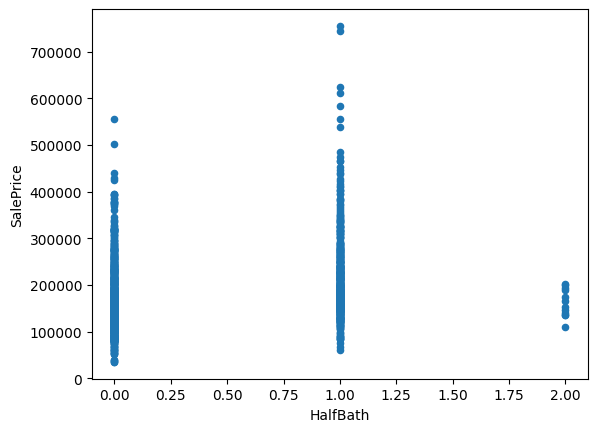

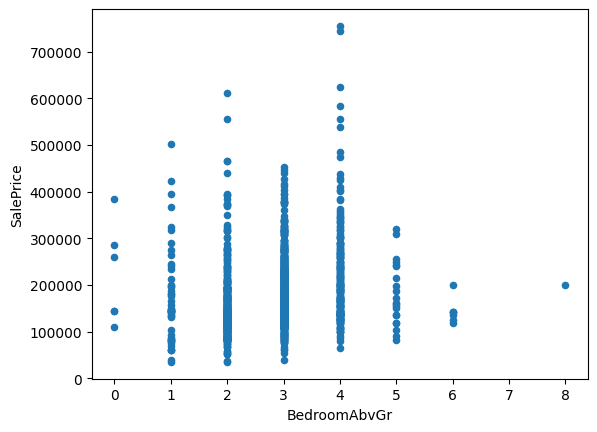

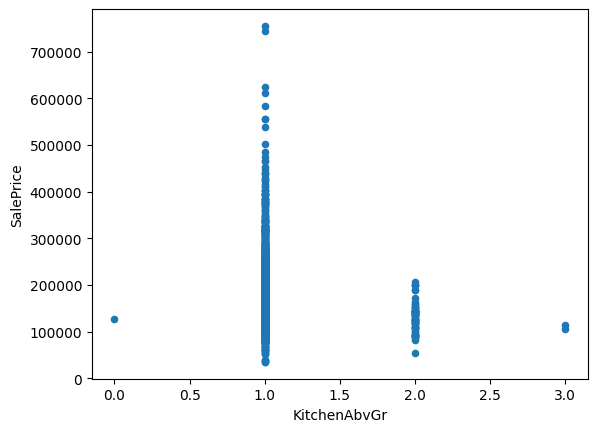

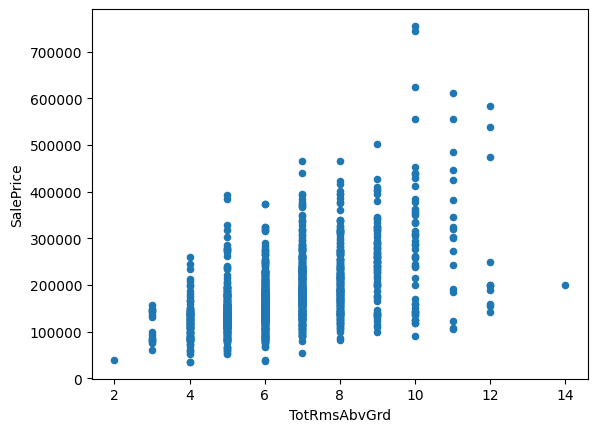

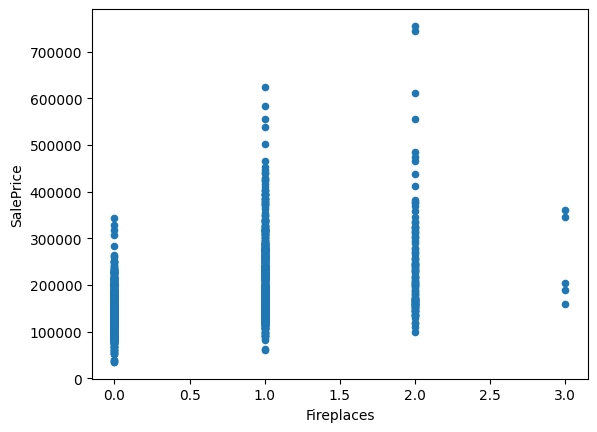

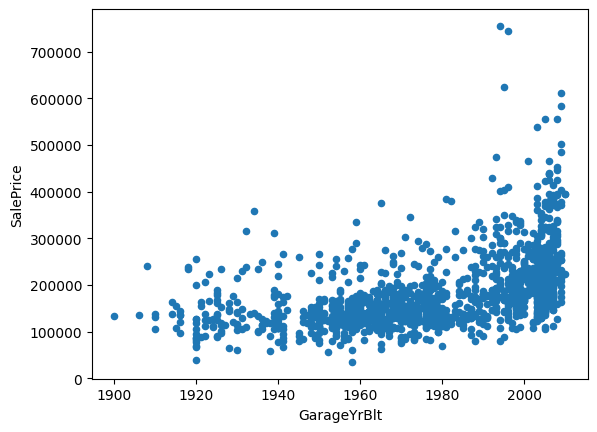

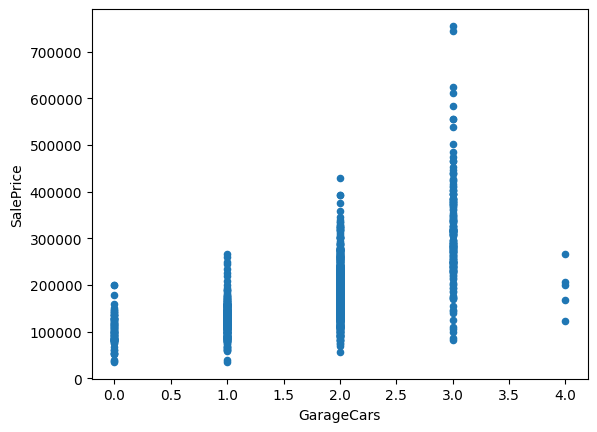

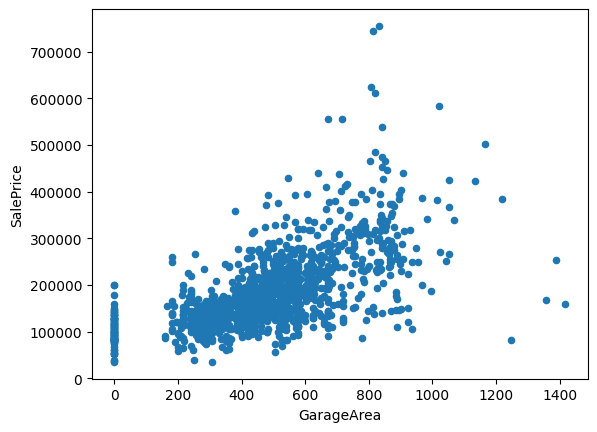

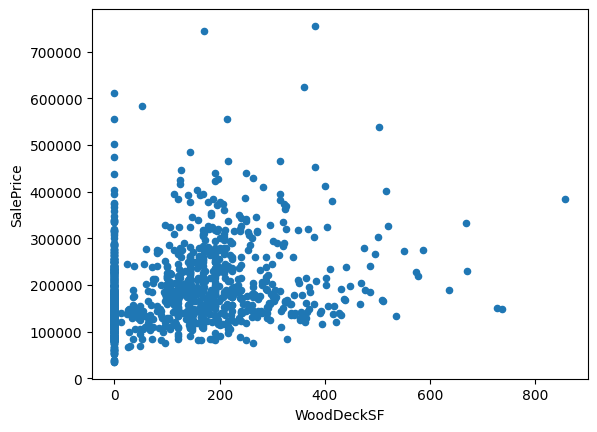

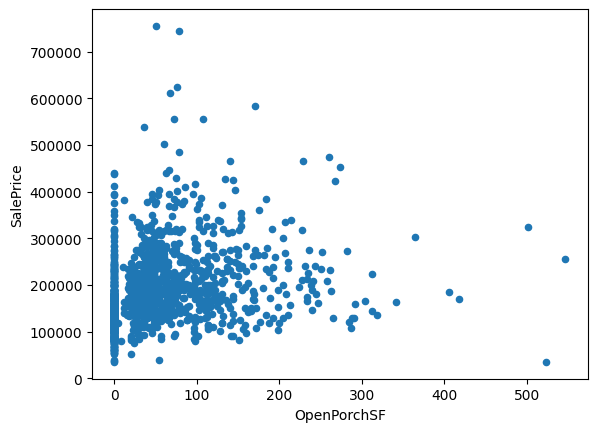

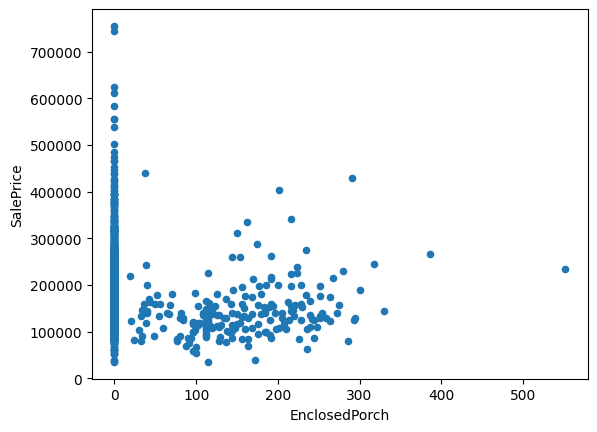

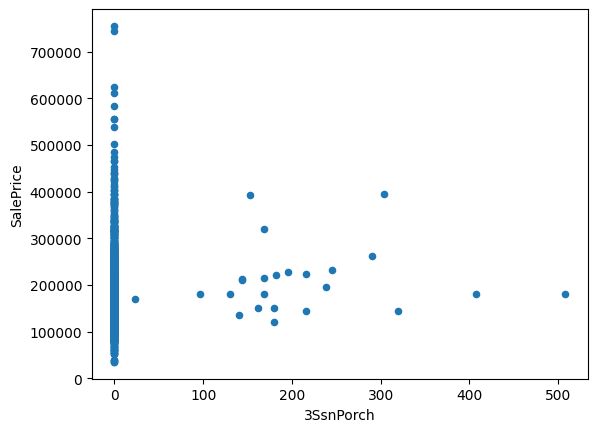

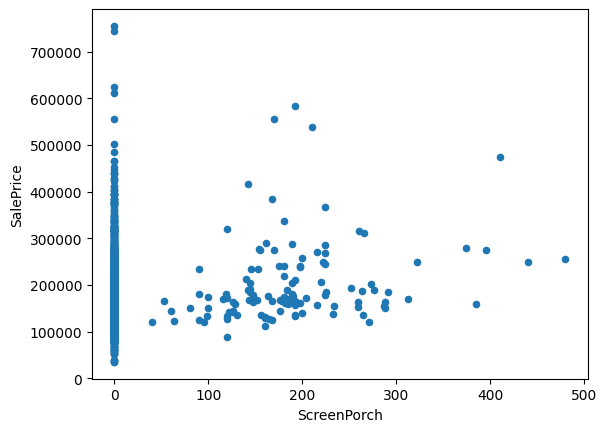

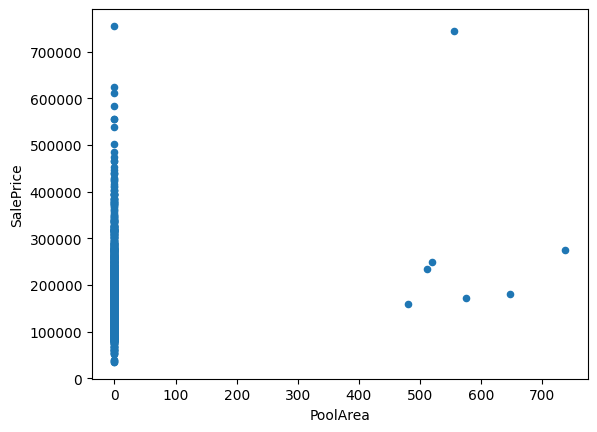

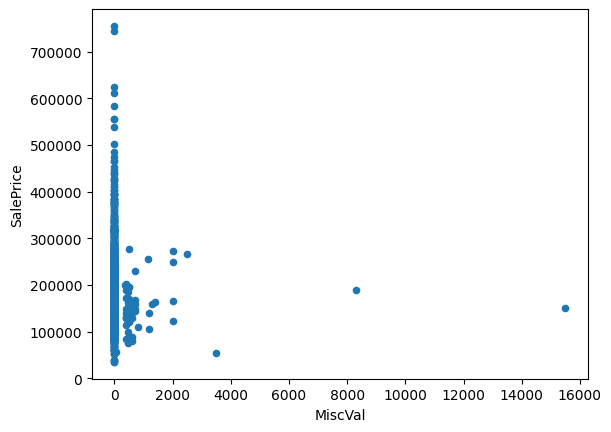

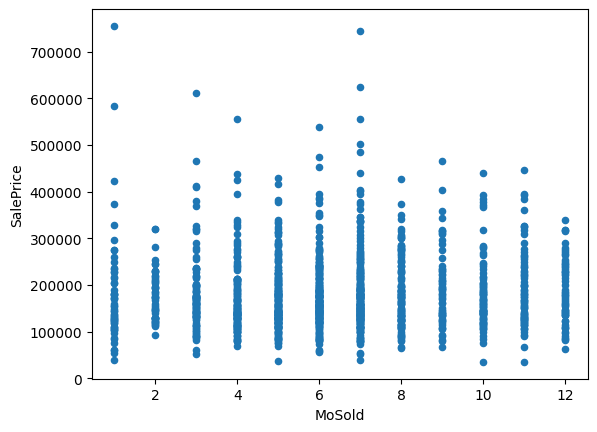

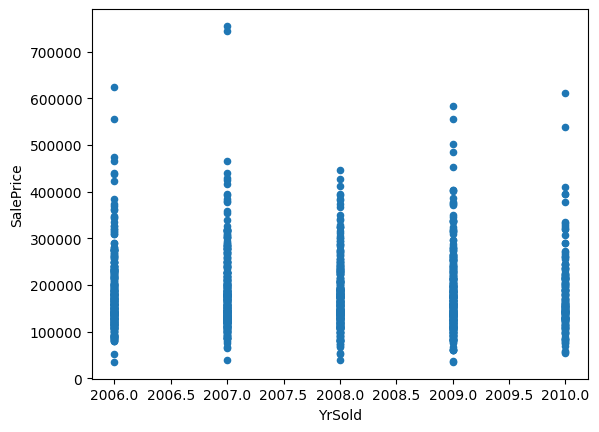

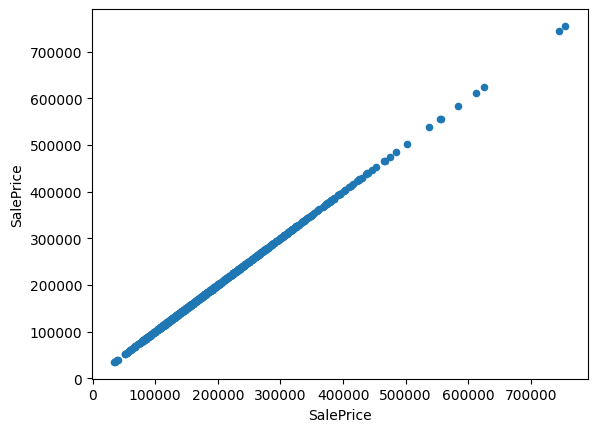

In [1737]:
for column in list(train_data.dtypes[train_data.dtypes != 'object'].index):
    train_data.plot.scatter(column, 'SalePrice')

In [1738]:
print('the categorical type data columns:')

print(train_data.dtypes[train_data.dtypes == 'object'].index)

print('There are {} columns are categorical data'.format(len(train_data.dtypes[train_data.dtypes == 'object'].index)))

the categorical type data columns:
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
There are 43 columns are categorical data


/opt/homebrew/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/opt/homebrew/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/opt/homebrew/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/opt/homebrew/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/opt/homebrew/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/opt/

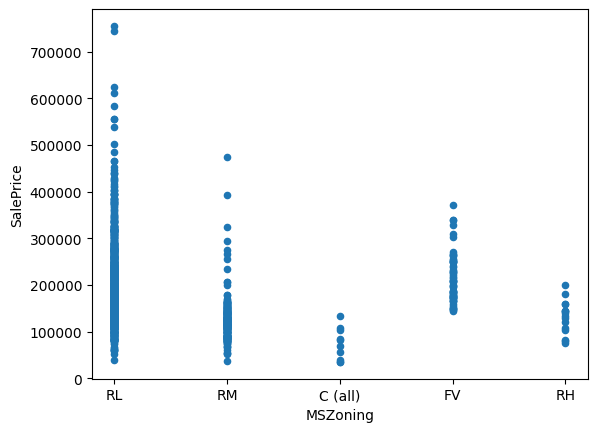

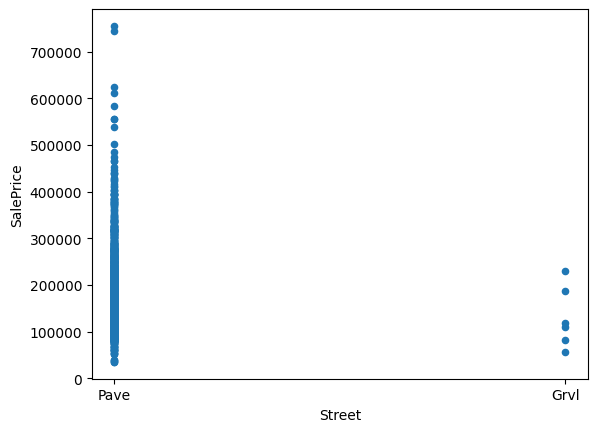

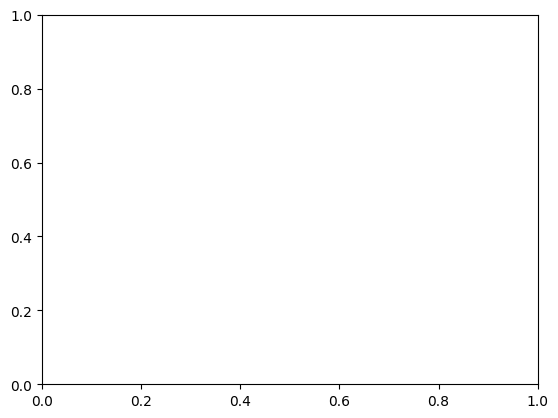

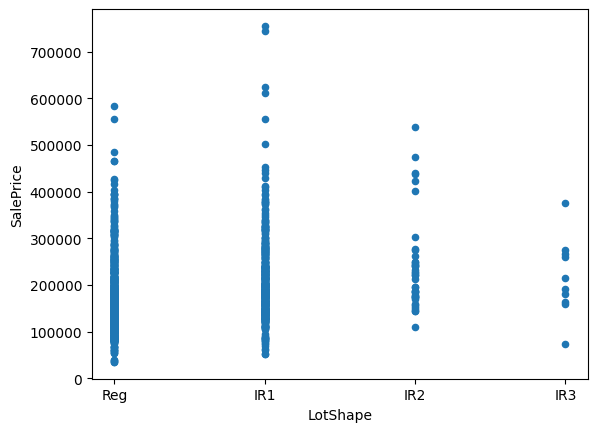

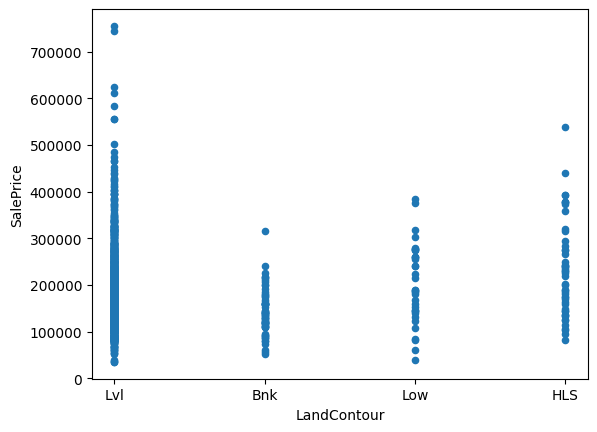

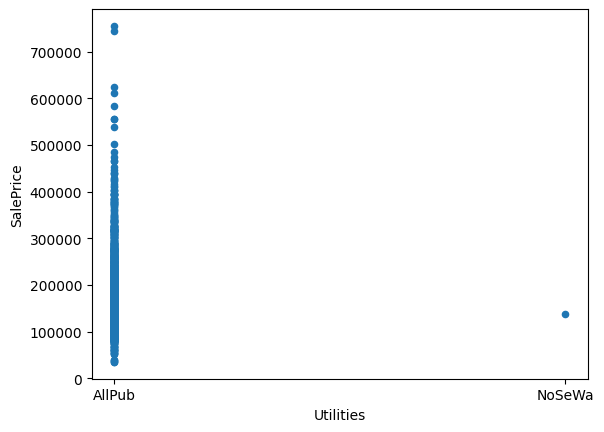

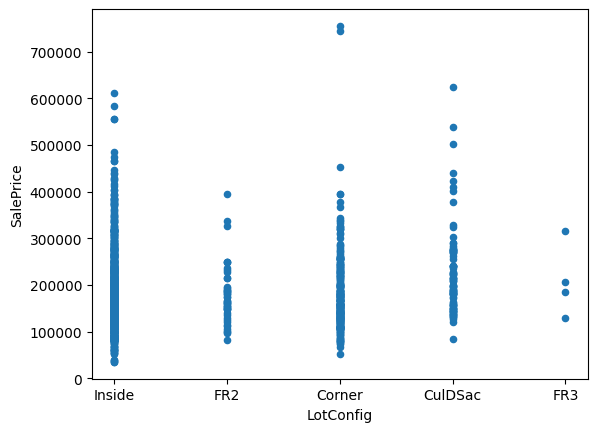

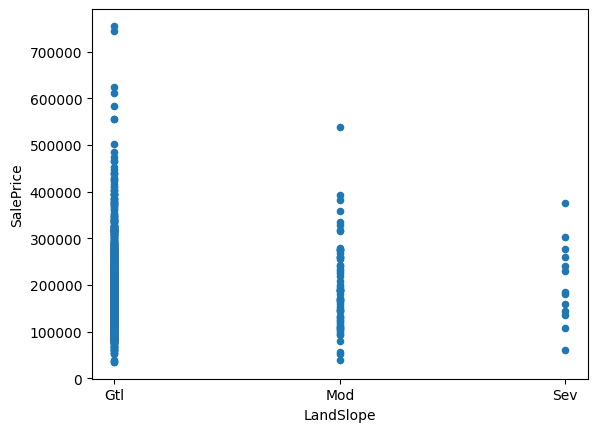

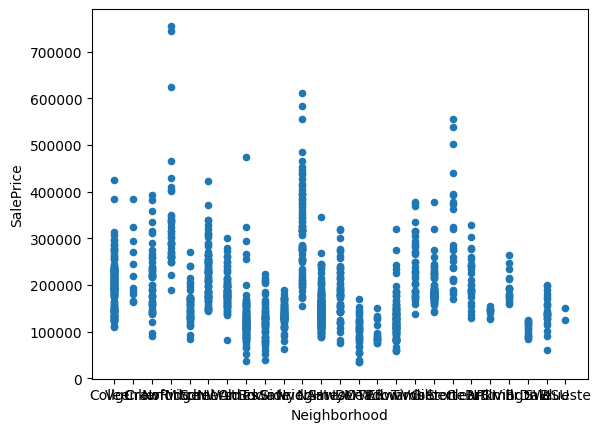

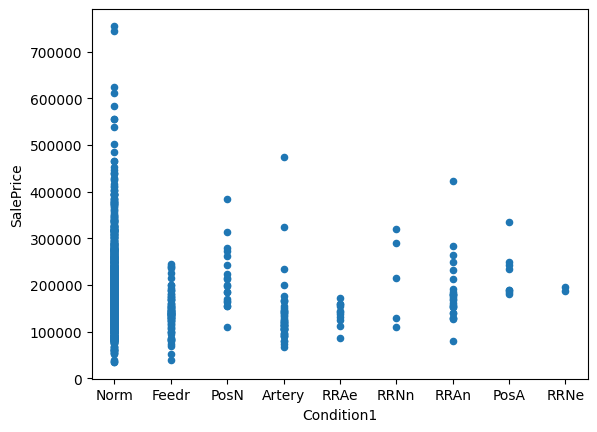

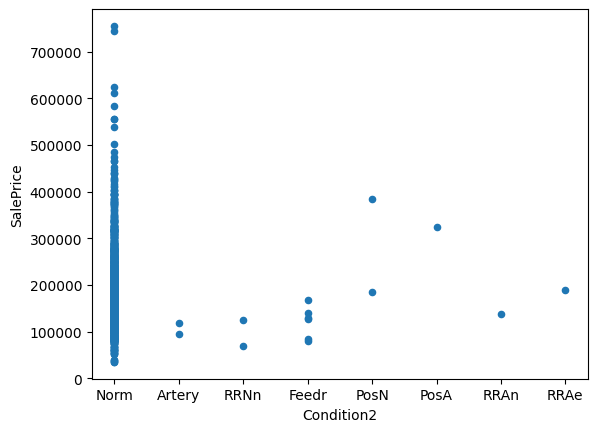

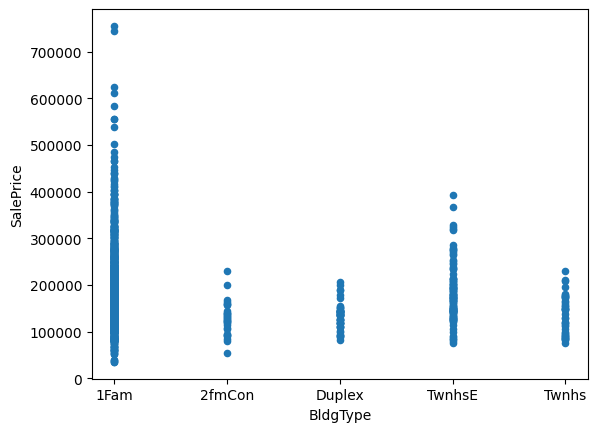

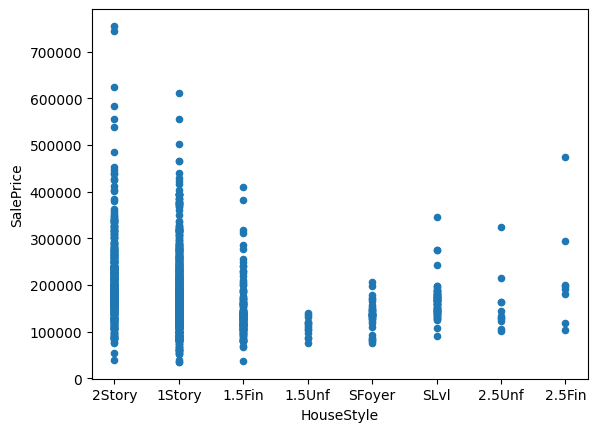

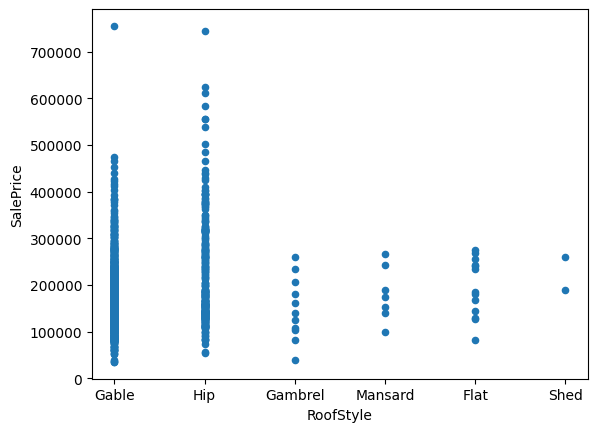

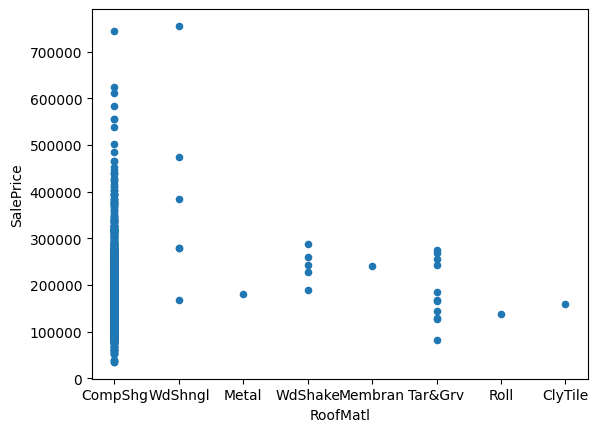

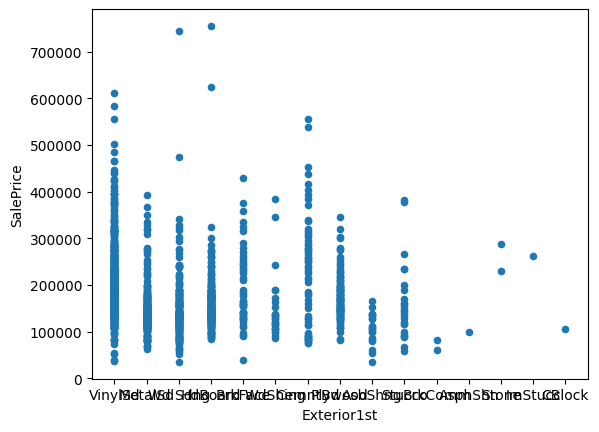

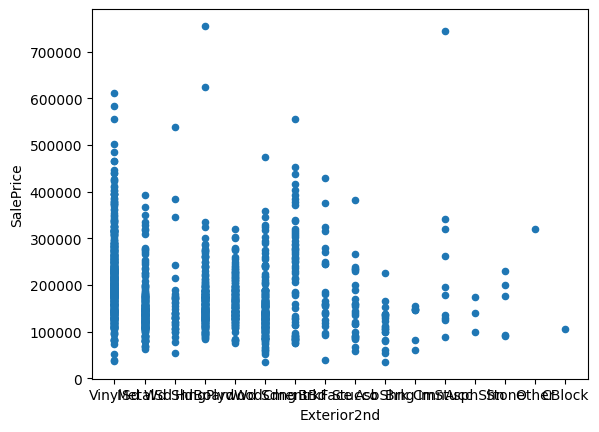

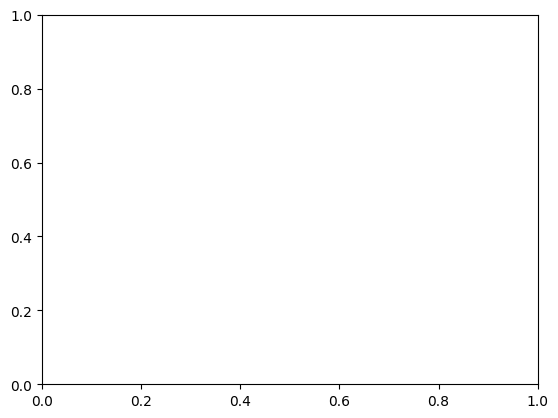

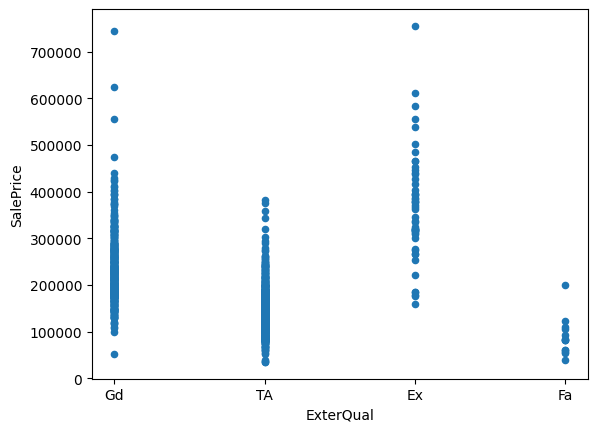

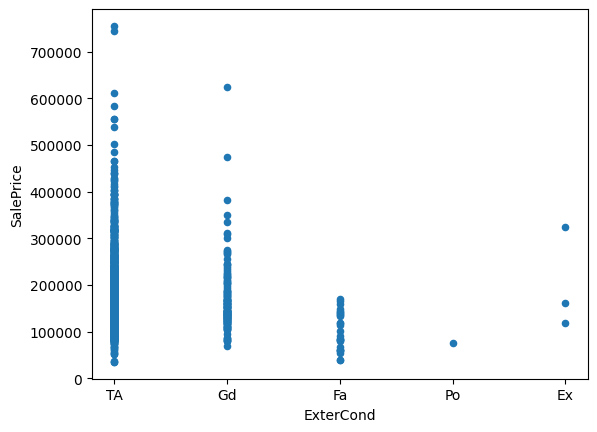

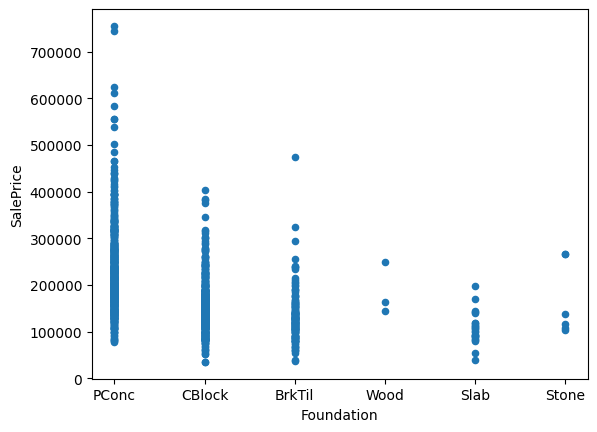

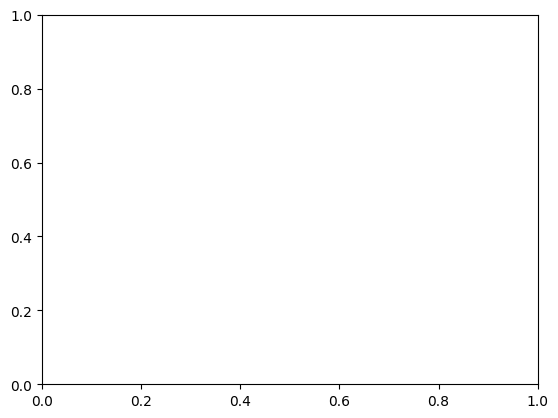

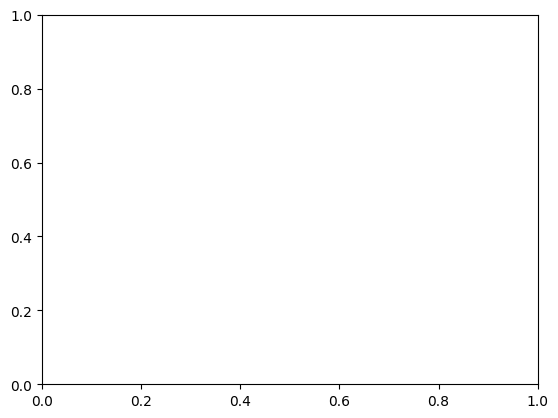

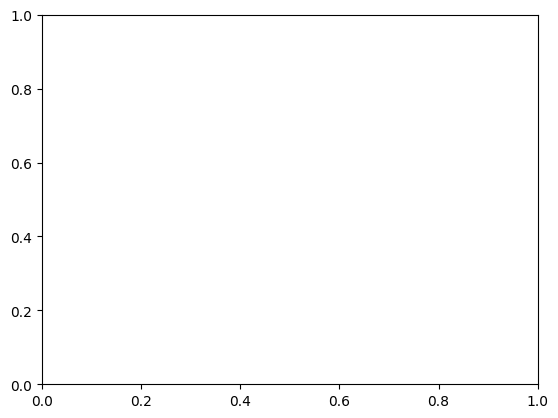

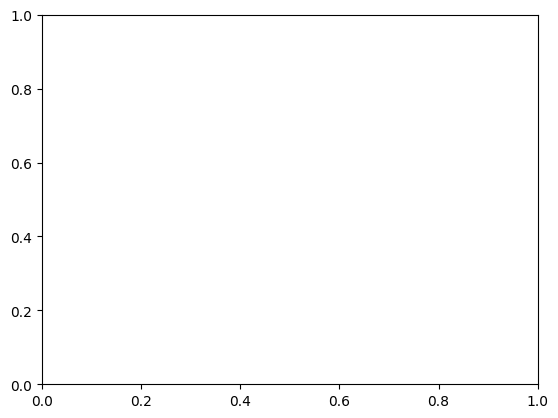

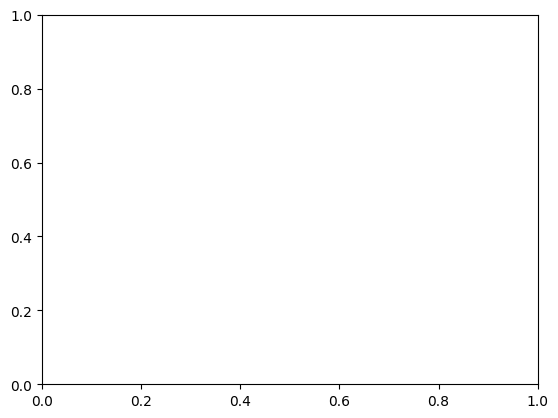

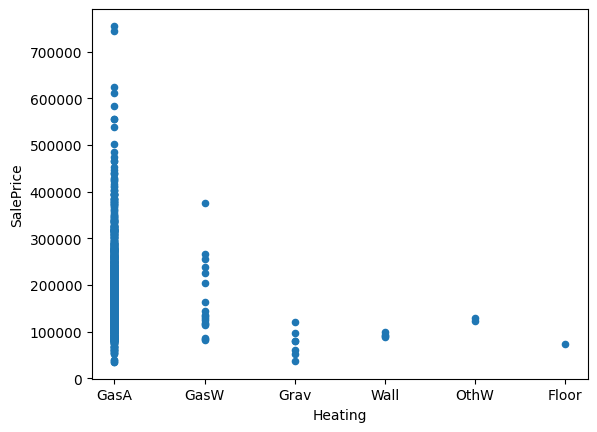

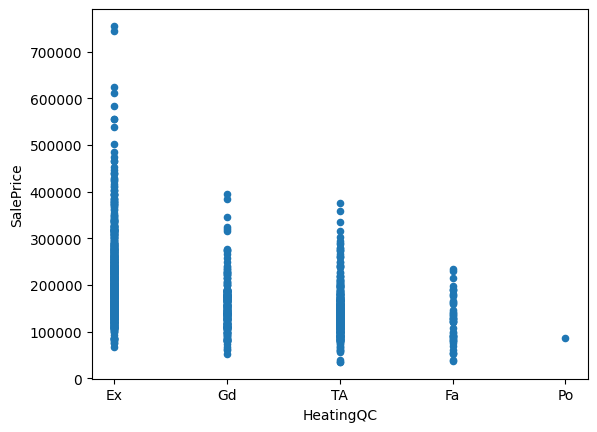

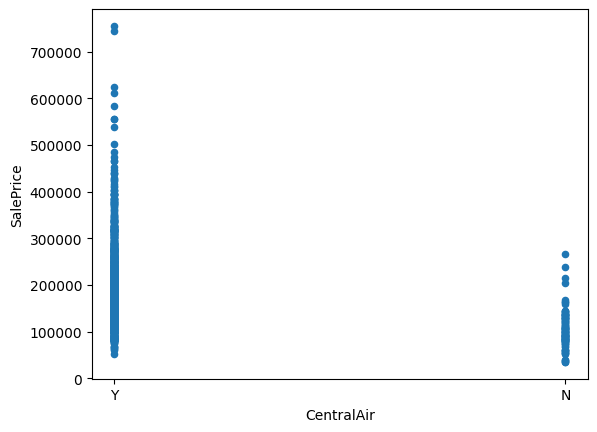

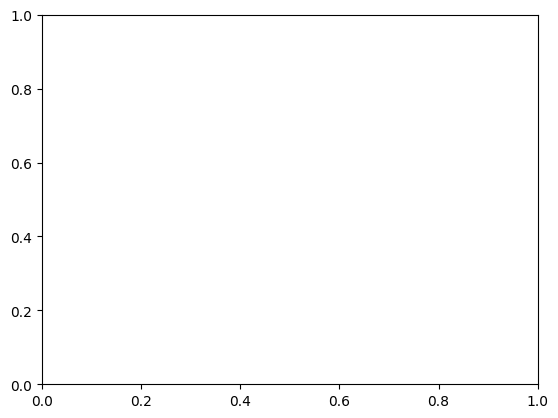

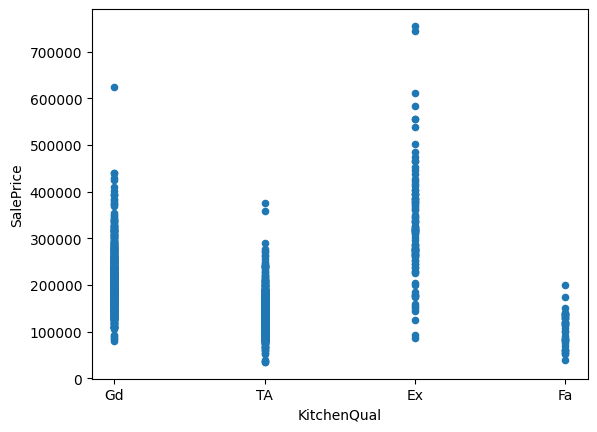

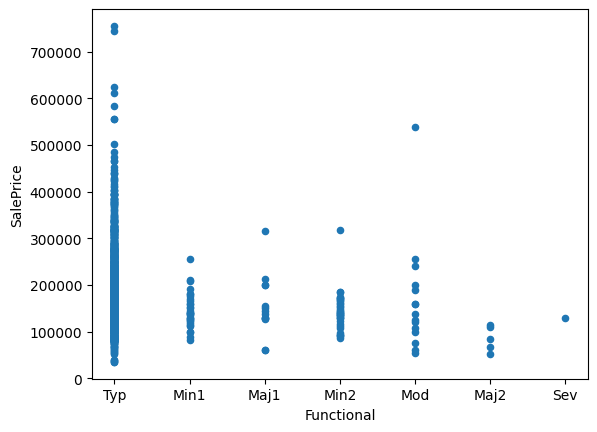

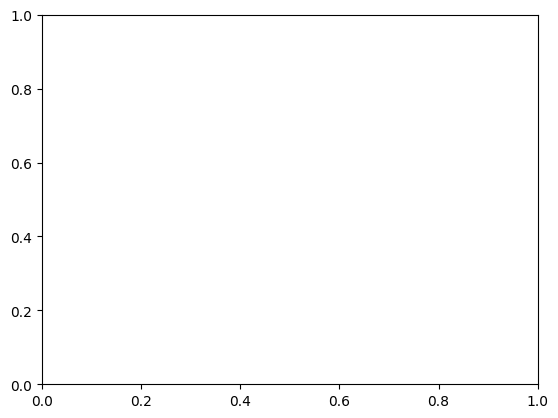

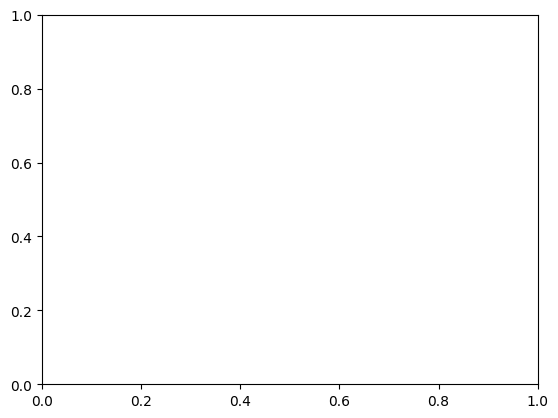

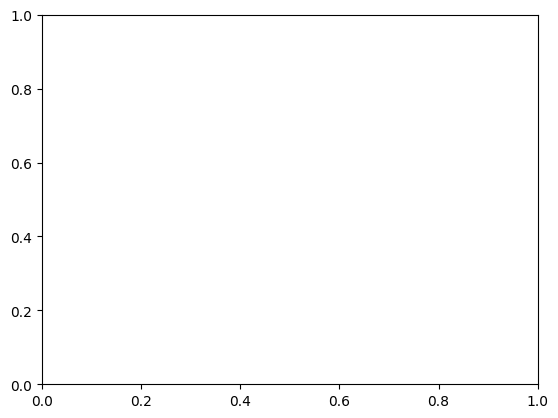

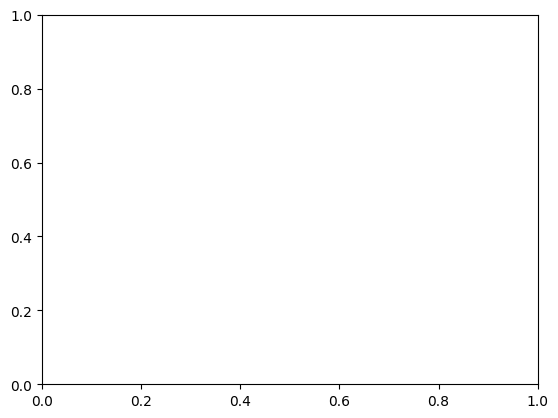

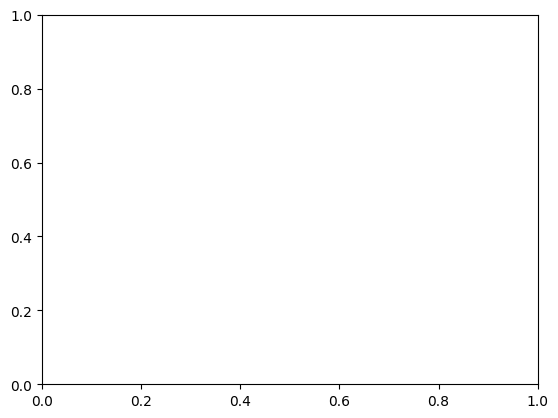

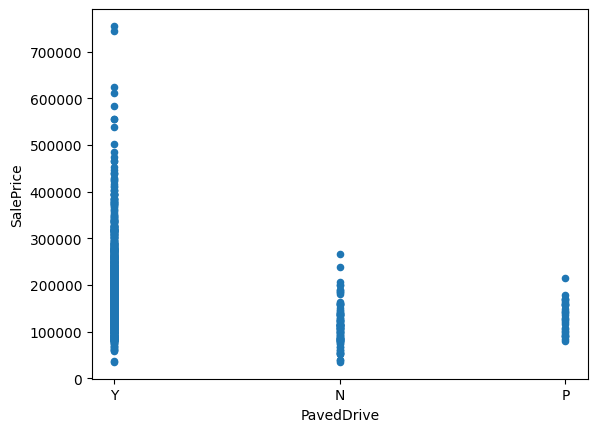

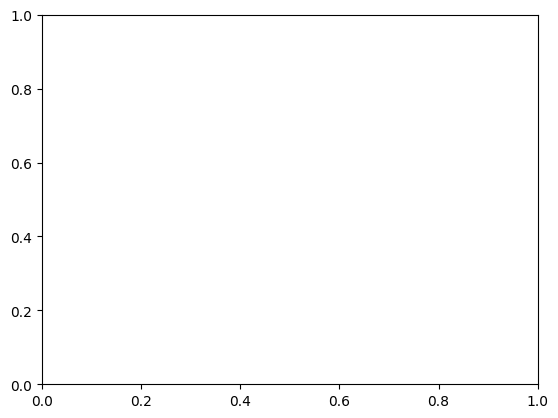

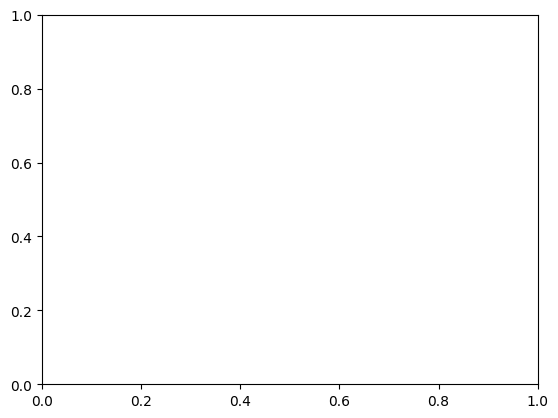

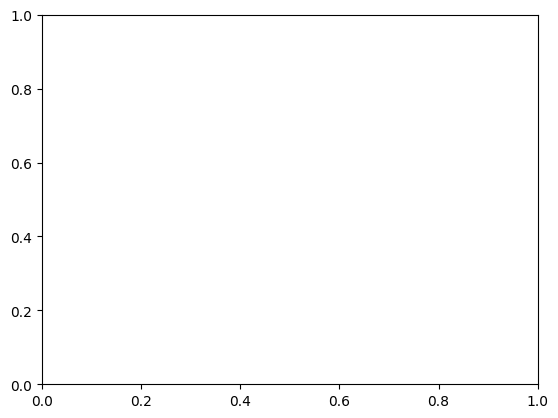

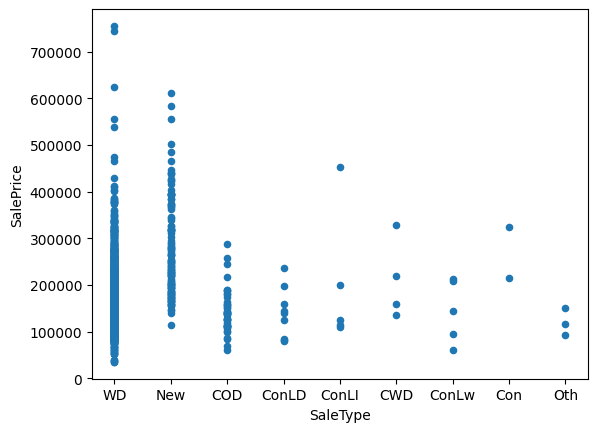

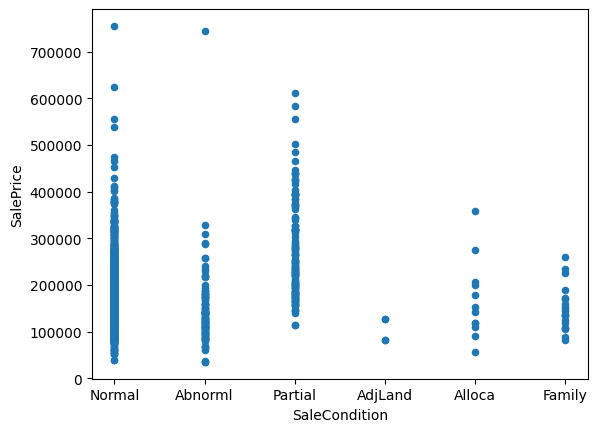

In [1812]:
for column in list(train_data.dtypes[train_data.dtypes == 'object'].index):
    try:
        train_data.plot.scatter(column,'SalePrice')
    except:
        pass

Thoose scatter plot shows the relationship/plattern betweeen the features and the Sale Price

For example, 

i) Better overall quality related to a higher sale price.

ii) Larger above grade (ground) living area related to a higher Price.

iii) Most houses without central air conditioning which are usually having a lower price

iv) The sale price is averagely higher if the size of garage in car capacity is bigger 

v) The sale price is getting lower if the quality of heating is poor.

In [1740]:
print('The first five observations in the data set : ')
train_data.head(5)

The first five observations in the data set : 


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.00000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.00000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.00000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.00000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.00000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Data checking 

In [1741]:
# the description of column SalePrice
train_data.SalePrice.describe()

count     1460.00000
mean    180921.19589
std      79442.50288
min      34900.00000
25%     129975.00000
50%     163000.00000
75%     214000.00000
max     755000.00000
Name: SalePrice, dtype: float64

The mean of the data: 180921.19589041095
The median of the data: 163000.0
The mode of the data: 140000
Skew is: 1.8828757597682129


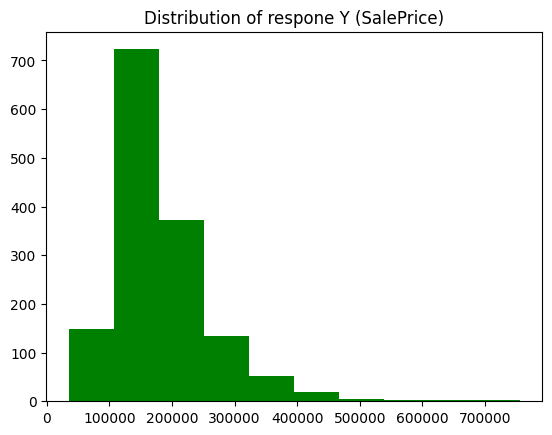

Since the mean is great than the median, the data are positive Skew


In [1742]:
print('The mean of the data:',train_data.SalePrice.mean())
print('The median of the data:',train_data.SalePrice.median())
print('The mode of the data:',train_data.SalePrice.mode().values[0])
print ("Skew is:", train_data.SalePrice.skew())
plt.title('Distribution of respone Y (SalePrice)')
plt.hist(train_data.SalePrice, color='green')
plt.show()
print('Since the mean is great than the median, the data are positive Skew')

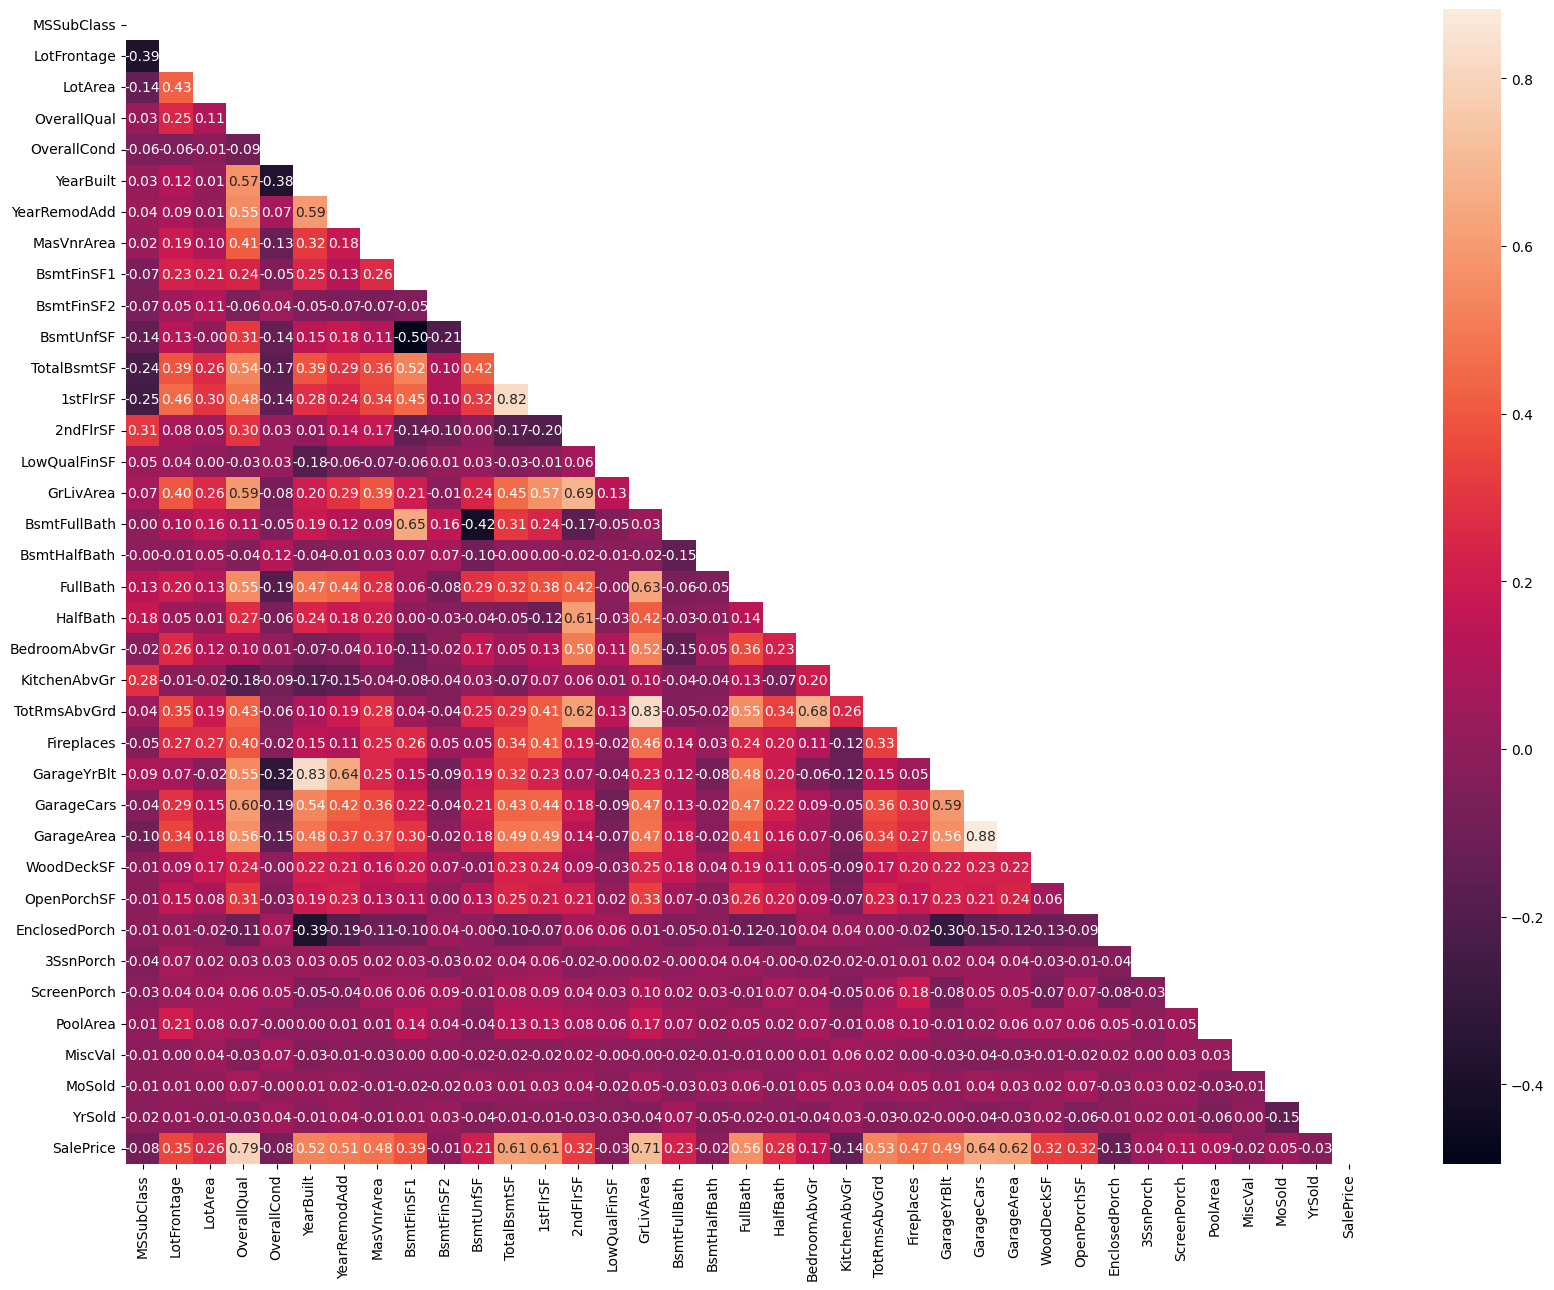

In [1743]:
import seaborn as sns
plt.figure(figsize = (20,15))
matrix=np.triu((train_data).corr())
sns.heatmap((train_data).corr(),annot=True,fmt='.2f',mask=matrix) 
plt.show()

We are spliting the dataset to two parts, one is the respone and the other are features

In [1744]:
# To split the feature and response of the data set

train_data_Y = train_data['SalePrice']
train_data_X = train_data.drop('SalePrice',axis = 1)

In [1745]:
train_data_Y =  np.log(train_data_Y)

The mean of the data: 12.024050901109383
The median of the data: 12.0015054797889
The mode of the data: 11.84939770159144
Skew is: 0.12133506220520406


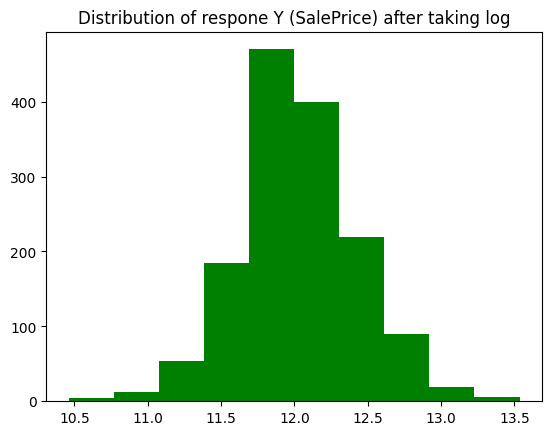

In [1746]:
# After taking log to the SalePrice, the redponse are more normalize 
print('The mean of the data:',train_data_Y.mean())
print('The median of the data:',train_data_Y.median())
print('The mode of the data:',train_data_Y.mode().values[0])
print ("Skew is:", train_data_Y.skew())
plt.title('Distribution of respone Y (SalePrice) after taking log')
plt.hist(train_data_Y, color='green')
plt.show()

Although the 'MSSubClass','YrSold','MoSold' are nnum type, but it represent a category.
therefore, we change the datatype of those columns to string

In [1747]:


train_data_X['MSSubClass'] = train_data_X['MSSubClass'].apply(str) 
train_data_X['YrSold'] = train_data_X['YrSold'].astype(str)
train_data_X['MoSold'] = train_data_X['MoSold'].astype(str)
train_data_X['GarageYrBlt'] = train_data_X['GarageYrBlt'].astype(str)

dealing with missing value

In [1748]:
# check the None values in each column by descending order
train_data_X.isnull().sum()[train_data_X.isnull().sum() != 0].sort_values(ascending = False)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [1749]:

print('there are ' + str(len(train_data_X.isnull().sum()[train_data_X.isnull().sum() != 0].sort_values(ascending = False))) + ' columns have missing value in the dataset')


there are 18 columns have missing value in the dataset


In [1750]:
# the Percentage of missing value for the columns has missing value

train_data_X.isnull().sum()[train_data_X.isnull().sum() != 0].sort_values(ascending = False)/len(train_data_X)*100

PoolQC         99.52055
MiscFeature    96.30137
Alley          93.76712
Fence          80.75342
FireplaceQu    47.26027
LotFrontage    17.73973
GarageType      5.54795
GarageFinish    5.54795
GarageQual      5.54795
GarageCond      5.54795
BsmtExposure    2.60274
BsmtFinType2    2.60274
BsmtFinType1    2.53425
BsmtCond        2.53425
BsmtQual        2.53425
MasVnrArea      0.54795
MasVnrType      0.54795
Electrical      0.06849
dtype: float64

Missing data filling 

In [1751]:
# For thoose type of data, the None value means that there is not this Attributes in that house, there for we fill None or 0 for the missing value

for columnname in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']:
    train_data_X[columnname] = train_data_X[columnname].fillna('None')

for columnname in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    train_data_X[columnname] = train_data_X[columnname].fillna('None')

for columnname in ["MasVnrArea", 'GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
    train_data_X[columnname] = train_data_X[columnname].fillna(0)


In [1752]:
# For the otherumeric data, we fill the missing data by the median of that feature

for feature in train_data_X.dtypes[train_data_X.dtypes != 'object'].index:
    if train_data_X[feature].isnull().sum() != 0:
        train_data_X[feature].fillna(train_data_X[feature].median(),inplace=True)

In [1753]:
# For the other Categorical data, we fill the missing data by the mode of that feature

for feature in train_data_X.dtypes[train_data_X.dtypes == 'object'].index:
    if train_data_X[feature].isnull().sum() != 0:
    
        train_data_X[feature].fillna(train_data_X[feature].mode(dropna= True).values[0],inplace=True)

In [1754]:
# There are no missing value after filling the missing value

train_data_X.isnull().sum().sum()

0

One hot encoding

In [1755]:

# Since the multiple linear regression model cannot handle with categorical data. Therefore, we need to change the categorical data to numeric form by using one hot encoding

encoded_predictors = pd.get_dummies(train_data_X)

general_train_X = encoded_predictors
general_train_Y = train_data_Y


In [1756]:
general_train_X.shape

(1460, 428)

The feature number of the train data has been increased to 428 after one hot encoding

Model building 

We are trying to fit the data to Multiple linear(MLR), regression, random forest (RF), k-nearest neighborhood(knn) to see which model Perform better in predicting Sale price.

Coefficient of determination (R2), Mean absolute error(MAE) and Root-mean-square error are used for evaluate the performance for each model

We are using 10 fold cross viladition to stabilize the results

In [1757]:
# MLR 

from sklearn import linear_model

lr = linear_model.LinearRegression()

lr_scores_r2 = cross_val_score(lr, general_train_X, general_train_Y, cv=10)
lr_scores_MAE = cross_val_score(lr, general_train_X, general_train_Y, cv=10, scoring="neg_mean_absolute_error")
lr_scores_RMSE = cross_val_score(lr, general_train_X, general_train_Y, cv=10, scoring="neg_root_mean_squared_error")

print('The average score of using diffience method for Multiple linear regression (trained by data without feature selection)')
print("Cross Validation Score(r2): " + str(np.mean(lr_scores_r2)))
print("Cross Validation Score(MAE): " + str(abs(np.mean(lr_scores_MAE))))
print("Cross Validation Score(RMSE): " + str(abs(np.mean(lr_scores_RMSE))))

reg_model_raw = lr.fit(general_train_X, general_train_Y )

The average score of using diffience method for Multiple linear regression (trained by data without feature selection)
Cross Validation Score(r2): -570203883.0440426
Cross Validation Score(MAE): 662.7946281802376
Cross Validation Score(RMSE): 4980.897838904995


In [1758]:
lr_scores_r2

array([-4.90798563e+06, -7.24327106e+07, -5.07832890e+09, -6.68726427e+04,
       -1.49493997e+08, -3.64165016e+08, -2.78995120e+07,  9.01463989e-01,
       -4.74383867e+06,  8.89123633e-01])

In [1759]:
abs(lr_scores_MAE)

array([7.24228958e+01, 4.70686475e+02, 4.52668763e+03, 9.22090342e+00,
       5.53057107e+02, 6.08150057e+02, 2.63080598e+02, 8.36197208e-02,
       1.24469718e+02, 8.72746895e-02])

In [1760]:
abs(lr_scores_RMSE)

array([8.36677257e+02, 3.33600728e+03, 3.02483861e+04, 1.10106267e+02,
       5.55528290e+03, 6.85224975e+03, 2.05014056e+03, 1.16933558e-01,
       8.19877508e+02, 1.33850683e-01])

For the MLR model, it may have the problem of overfitting if we use all the feature as the predictor. 
In the 10 time of 10-fold cross validation iteration, only 2 iteration result meaningful r-squeare result. Other result are all negative

The negative result of r-squeare means than the the best-fit model fits the data worse than a horizontal line.
There for the MLR model with all feature selected is not a appropriate model for predicting the Sale price.

In [1804]:
# RF

from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=10,random_state=1233)

rf_scores_r2 = cross_val_score(rf_regressor, general_train_X, general_train_Y, cv=10)
rf_scores_MAE = cross_val_score(rf_regressor, general_train_X, general_train_Y, cv=10, scoring="neg_mean_absolute_error")
rf_scores_RMSE = cross_val_score(rf_regressor, general_train_X, general_train_Y, cv=10, scoring="neg_root_mean_squared_error")

print('The average score of using diffience method for random forest (trained by data without feature selection)')
print("Cross Validation Score(r2): " + str(np.mean(rf_scores_r2)))
print("Cross Validation Score(MAE): " + str(abs(np.mean(rf_scores_MAE))))
print("Cross Validation Score(RMSE): " + str(abs(np.mean(rf_scores_RMSE))))

rf_model_raw = rf_regressor.fit(general_train_X  , general_train_Y)


The average score of using diffience method for random forest (trained by data without feature selection)
Cross Validation Score(r2): 0.8562441334149213
Cross Validation Score(MAE): 0.10282784908350281
Cross Validation Score(RMSE): 0.1501950890020116


In [1762]:
# KNN

from sklearn.neighbors import KNeighborsRegressor


knn_regressor = KNeighborsRegressor(n_neighbors = 10)

knn_scores_r2 = cross_val_score(knn_regressor, general_train_X, general_train_Y, cv=10)
knn_scores_MAE = cross_val_score(knn_regressor, general_train_X, general_train_Y, cv=10, scoring="neg_mean_absolute_error")
knn_scores_RMSE = cross_val_score(knn_regressor, general_train_X, general_train_Y, cv=10, scoring="neg_root_mean_squared_error")

print('The average score of using diffience method for knn (trained by data without feature selection )')
print("Cross Validation Score(r2): " + str(np.mean(knn_scores_r2)))
print("Cross Validation Score(MAE): " + str(abs(np.mean(knn_scores_MAE))))
print("Cross Validation Score(RMSE): " + str(abs(np.mean(knn_scores_RMSE))))

knn_model_raw = knn_regressor.fit(general_train_X  , general_train_Y)



The average score of using diffience method for knn (trained by data without feature selection )
Cross Validation Score(r2): 0.6853388131433737
Cross Validation Score(MAE): 0.16137764521357525
Cross Validation Score(RMSE): 0.2226381975556408


we trying to increase the preformace by feature selection (select the columns with higher correlation, i.e. abs(correlation) > 0.3 )

In [1763]:
combine = general_train_X.copy()
combine['SalePrice'] = general_train_Y

great_corr  = list(combine.corr()['SalePrice'][(abs(combine.corr()['SalePrice']) > 0.3)].index)

great_corr.remove('SalePrice')

gen_train_X_v2 = general_train_X[great_corr]
gen_train_Y_v2 = general_train_Y

# we only left the columns with it correlation with 'SalesPrice' is greater than 0.3 or less than -0.3

gen_train_X_v2.shape



(1460, 58)

After feature selection, the train data remain 58 feature

We train the model again by using the data after feature selection

In [1764]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import numpy as np

lr = linear_model.LinearRegression()

lr_improve_scores_r2 = cross_val_score(lr, gen_train_X_v2, gen_train_Y_v2, cv=10)
lr_improve_scores_MAE = cross_val_score(lr, gen_train_X_v2, gen_train_Y_v2, cv=10, scoring="neg_mean_absolute_error")
lr_improve_scores_RMSE = cross_val_score(lr, gen_train_X_v2, gen_train_Y_v2, cv=10, scoring="neg_root_mean_squared_error")

print('The average score of using diffience method for Multiple linear regression (trained by data with feature selection )')
print("Cross Validation Score(r2): " + str(np.mean(lr_improve_scores_r2)))
print("Cross Validation Score(MAE): " + str(abs(np.mean(lr_improve_scores_MAE))))
print("Cross Validation Score(RMSE): " + str(abs(np.mean(lr_improve_scores_RMSE))))

linear_model_improve = lr.fit(gen_train_X_v2, gen_train_Y_v2)

The average score of using diffience method for Multiple linear regression (trained by data with feature selection )
Cross Validation Score(r2): 0.830688121363837
Cross Validation Score(MAE): 0.10433501418904334
Cross Validation Score(RMSE): 0.15774321941387318


In [1805]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np


rf_regressor = RandomForestRegressor(n_estimators=40,random_state=1233)


rf_improve_scores_r2 = cross_val_score(rf_regressor, gen_train_X_v2, gen_train_Y_v2, cv=10)
rf_improve_scores_MAE = cross_val_score(rf_regressor, gen_train_X_v2, gen_train_Y_v2, cv=10, scoring="neg_mean_absolute_error")
rf_improve_scores_RMSE = cross_val_score(rf_regressor, gen_train_X_v2, gen_train_Y_v2, cv=10, scoring="neg_root_mean_squared_error")

print('The average score of using diffience method for Random forest (trained by data with feature selection )')
print("Cross Validation Score(r2): " + str(np.mean(rf_improve_scores_r2)))
print("Cross Validation Score(MAE): " + str(abs(np.mean(rf_improve_scores_MAE))))
print("Cross Validation Score(RMSE): " + str(abs(np.mean(rf_improve_scores_RMSE))))

rf_model_improve = rf_regressor.fit(gen_train_X_v2, gen_train_Y_v2)


The average score of using diffience method for Random forest (trained by data with feature selection )
Cross Validation Score(r2): 0.8633763673692636
Cross Validation Score(MAE): 0.10105592817036535
Cross Validation Score(RMSE): 0.14635777759685803


In [1766]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

knn_regressor = KNeighborsRegressor(n_neighbors = 10)

knn_improve_scores_r2 = cross_val_score(knn_regressor, gen_train_X_v2, gen_train_Y_v2, cv=10,scoring="r2")
knn_improve_scores_MAE = cross_val_score(knn_regressor, gen_train_X_v2, gen_train_Y_v2, cv=10, scoring="neg_mean_absolute_error")
knn_improve_scores_RMSE = cross_val_score(knn_regressor, gen_train_X_v2, gen_train_Y_v2, cv=10, scoring="neg_root_mean_squared_error")

print('The average score of using diffience method for knn (trained by data with feature selection )')
print("Cross Validation Score(r2): " + str(np.mean(knn_improve_scores_r2)))
print("Cross Validation Score(MAE): " + str(abs(np.mean(knn_improve_scores_MAE))))
print("Cross Validation Score(RMSE): " + str(abs(np.mean(knn_improve_scores_RMSE))))

knn_model_improve = knn_regressor.fit(gen_train_X_v2, gen_train_Y_v2)


The average score of using diffience method for knn (trained by data with feature selection )
Cross Validation Score(r2): 0.749614851340981
Cross Validation Score(MAE): 0.1400761711593309
Cross Validation Score(RMSE): 0.19810677131555726


We are trying to use catboost model to predict the sale price 

In [1767]:
# since the catboost regression can handle the Category data. Therefore, we will use the data without one-hotencoding and feature selection to train the model

numerical_columns=[]
categorical_columns=[]
for feature in train_data_X .columns:
        if(train_data_X [feature].dtype=='O' ):
            categorical_columns.append(feature)
        else:
            numerical_columns.append(feature)

In [1768]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

def get_catboost_score(train_index,test_index):

    cat_model = CatBoostRegressor(loss_function='RMSE', 
                                       random_seed=2, 
                                       max_depth = 10,
                                       learning_rate = 0.05,
                                       random_strength=1,
                                       max_ctr_complexity=1,
                                       l2_leaf_reg=8,
                                       grow_policy = 'Lossguide'
                                      )

    pool_train = Pool(train_data_X.iloc[train_index,:], train_data_Y.iloc[train_index], cat_features=categorical_columns)
    model = cat_model.fit(pool_train)
    test_pred = model.predict(train_data_X.iloc[test_index,:])

    test_true = train_data_Y.iloc[test_index]
    r2 = model.score(train_data_X.iloc[test_index,:], train_data_Y.iloc[test_index])
    MAE = mean_absolute_error(test_true , test_pred)
    RMSE = math.sqrt(mean_squared_error(test_true , test_pred))
    
    return r2,MAE,RMSE
    
    

In [1769]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=False)

r2 =[]
MAE = []
RMSE = []

for train_index, test_index in kf.split(train_data_X):
    
    result = get_catboost_score(train_index, test_index)
    r2.append(result[0])
    MAE.append(result[1])
    RMSE.append(result[2])
    

0:	learn: 0.3886748	total: 11.7ms	remaining: 11.7s
1:	learn: 0.3768308	total: 23ms	remaining: 11.5s
2:	learn: 0.3658284	total: 33.3ms	remaining: 11.1s
3:	learn: 0.3553382	total: 43.1ms	remaining: 10.7s
4:	learn: 0.3444785	total: 51.2ms	remaining: 10.2s
5:	learn: 0.3360224	total: 61.6ms	remaining: 10.2s
6:	learn: 0.3271947	total: 72.5ms	remaining: 10.3s
7:	learn: 0.3182906	total: 81.7ms	remaining: 10.1s
8:	learn: 0.3108786	total: 91.2ms	remaining: 10s
9:	learn: 0.3030057	total: 103ms	remaining: 10.2s
10:	learn: 0.2948662	total: 113ms	remaining: 10.1s
11:	learn: 0.2877604	total: 122ms	remaining: 10.1s
12:	learn: 0.2813648	total: 131ms	remaining: 9.92s
13:	learn: 0.2745733	total: 141ms	remaining: 9.95s
14:	learn: 0.2678381	total: 152ms	remaining: 9.99s
15:	learn: 0.2619923	total: 162ms	remaining: 9.99s
16:	learn: 0.2557736	total: 172ms	remaining: 9.94s
17:	learn: 0.2500683	total: 182ms	remaining: 9.91s
18:	learn: 0.2445531	total: 191ms	remaining: 9.87s
19:	learn: 0.2391180	total: 203ms	re

In [1770]:
import statistics

print('The average score of using diffience method for knn (trained by data without feature selection )')
print("Cross Validation Score(r2): " + str(statistics.mean(r2)))
print("Cross Validation Score(MAE): " + str(statistics.mean(MAE)))
print("Cross Validation Score(RMSE): " + str(statistics.mean(RMSE)))


The average score of using diffience method for knn (trained by data without feature selection )
Cross Validation Score(r2): 0.9056003301376492
Cross Validation Score(MAE): 0.08094554319948952
Cross Validation Score(RMSE): 0.12136429924634123


In [1771]:
catboost_regresser = CatBoostRegressor(loss_function='RMSE', 
                                       random_seed=2, 
                                       max_depth = 10,
                                       learning_rate = 0.05,
                                       random_strength=1,
                                       max_ctr_complexity=1,
                                       l2_leaf_reg=8,
                                       grow_policy = 'Lossguide'
                                      )

pool_train = Pool(train_data_X, train_data_Y, cat_features=categorical_columns)
catboost_model = catboost_regresser.fit(pool_train)

0:	learn: 0.3869203	total: 37.2ms	remaining: 37.1s
1:	learn: 0.3760074	total: 56.3ms	remaining: 28.1s
2:	learn: 0.3647076	total: 69ms	remaining: 22.9s
3:	learn: 0.3535411	total: 79.9ms	remaining: 19.9s
4:	learn: 0.3430639	total: 90.5ms	remaining: 18s
5:	learn: 0.3332381	total: 101ms	remaining: 16.7s
6:	learn: 0.3236597	total: 111ms	remaining: 15.8s
7:	learn: 0.3149565	total: 121ms	remaining: 15.1s
8:	learn: 0.3069013	total: 131ms	remaining: 14.4s
9:	learn: 0.2997437	total: 142ms	remaining: 14.1s
10:	learn: 0.2921793	total: 158ms	remaining: 14.2s
11:	learn: 0.2848359	total: 171ms	remaining: 14.1s
12:	learn: 0.2775437	total: 180ms	remaining: 13.7s
13:	learn: 0.2713637	total: 192ms	remaining: 13.5s
14:	learn: 0.2644003	total: 203ms	remaining: 13.3s
15:	learn: 0.2586286	total: 213ms	remaining: 13.1s
16:	learn: 0.2527262	total: 223ms	remaining: 12.9s
17:	learn: 0.2469165	total: 232ms	remaining: 12.7s
18:	learn: 0.2412384	total: 254ms	remaining: 13.1s
19:	learn: 0.2360692	total: 267ms	remain

We have train 7 model and we are going to compare thier Performance

In [1806]:
data = {"R2":[np.mean(lr_scores_r2),np.mean(rf_scores_r2),np.mean(knn_scores_r2),np.mean(lr_improve_scores_r2),np.mean(rf_improve_scores_r2),np.mean(knn_improve_scores_r2),statistics.mean(r2)],
        "MAE":[abs(np.mean(lr_scores_MAE)),abs(np.mean(rf_scores_MAE)),abs(np.mean(knn_scores_MAE)),abs(np.mean(lr_improve_scores_MAE)),abs(np.mean(rf_improve_scores_MAE)),abs(np.mean(knn_improve_scores_MAE)),statistics.mean(MAE)],
        "RMSE":[abs(np.mean(lr_scores_RMSE)),abs(np.mean(rf_scores_RMSE)),abs(np.mean(knn_scores_RMSE)),abs(np.mean(lr_improve_scores_RMSE)),abs(np.mean(rf_improve_scores_RMSE)),abs(np.mean(knn_improve_scores_RMSE)),statistics.mean(RMSE)]


}
compare_df = pd.DataFrame(data,index=['MLR(without feature selection)','RF(without feature selection)' ,'KNN(without feature selection)','MLR(with feature selection)','RF(with feature selection)' ,'KNN(with feature selection)','CatBoost'])

In [1807]:
pd.options.display.float_format = '{:.5f}'.format
compare_df

,R2,MAE,RMSE
MLR(without feature selection),-570203883.04404,662.79463,4980.89784
RF(without feature selection),0.85624,0.10283,0.15020
KNN(without feature selection),0.68534,0.16138,0.22264
MLR(with feature selection),0.83069,0.10434,0.15774
RF(with feature selection),0.86338,0.10106,0.14636
KNN(with feature selection),0.74961,0.14008,0.19811
CatBoost,0.90560,0.08095,0.12136


We can observe that the CatBoost have the best preformce among different models because it have the highest R2 and lowerest MAE and RMSE,
therefore we will choose the Catboost 


In [1808]:
compare_meaningful_df = compare_df.sort_values('MAE',ascending = False)  #.drop('MLR(without feature selection)')

compare_meaningful_df = compare_meaningful_df.drop('MLR(without feature selection)')

In [1809]:
compare_meaningful_df

,R2,MAE,RMSE
KNN(without feature selection),0.68534,0.16138,0.22264
KNN(with feature selection),0.74961,0.14008,0.19811
MLR(with feature selection),0.83069,0.10434,0.15774
RF(without feature selection),0.85624,0.10283,0.15020
RF(with feature selection),0.86338,0.10106,0.14636
CatBoost,0.90560,0.08095,0.12136


<AxesSubplot: >

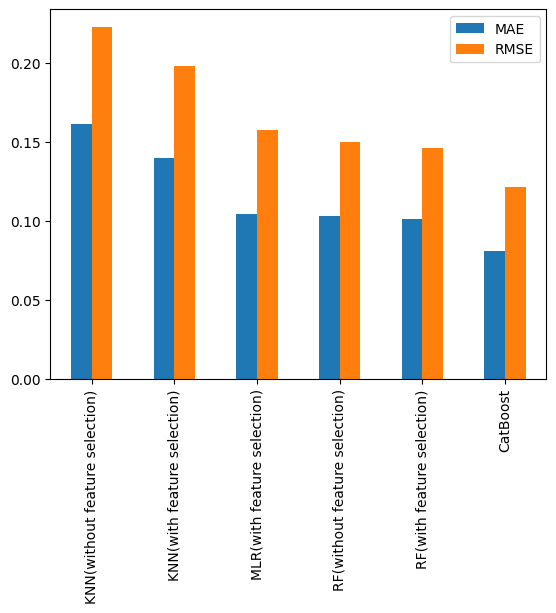

In [1810]:
compare_meaningful_df[['MAE','RMSE']].plot.bar()

The CatBoost Model perform the best in the cross validation (With the largest R2 and the smallest MAE and RMSE).

<AxesSubplot: >

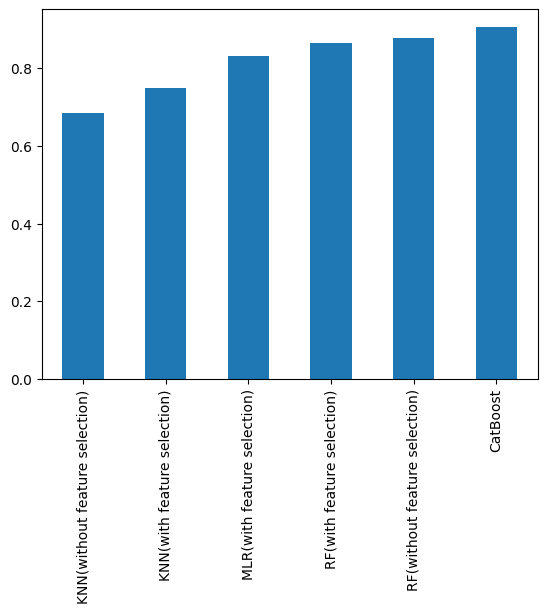

In [1777]:
compare_meaningful_df['R2'].plot.bar()

Also, we found that doing feature selection can improve the performance of the prediction.


The Multiple linear model has RMSE 0.22264 after doing model selection
The RMSE of the random forest model reduce from 0.1502 to 0.14636.
The RMSE of knn model reduce from 0.22264 to 0.19811.

For the of the model with feature selection, the R2 is larger and MAE $RMSE are smaller than the models with no feature selection.The model with feature selection preform better for predicting unseen data.  

The possible reason is that the feature selection remove the column with low correlation, reduce the noise of the data.



In [1778]:
# convert the testing data for subission to the kaggle computition
submission_test_X = pd.read_csv("../data/test.csv", index_col=["Id"])

In [1779]:
def convert_test_data(df):
    
    df['MSSubClass'] = df['MSSubClass'].apply(str) 
    df['YrSold'] = df['YrSold'].astype(str)
    df['MoSold'] = df['MoSold'].astype(str)
    df['GarageYrBlt'] = df['GarageYrBlt'].astype(str)


    for columnname in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']:
        df[columnname] = df[columnname].fillna('None')

    for columnname in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
        df[columnname] = df[columnname].fillna('None')

    for columnname in ["MasVnrArea", 'GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
        df[columnname] = df[columnname].fillna(0)


    for feature in df.dtypes[df.dtypes != 'object'].index:
        if df[feature].isnull().sum() != 0:
            df[feature].fillna(train_data_X[feature].median(),inplace=True)

    for feature in df.dtypes[df.dtypes == 'object'].index:
        if df[feature].isnull().sum() != 0:
        
            df[feature].fillna(train_data_X[feature].mode(dropna= True).values[0],inplace=True)

    return df

In [1780]:
submission_X = convert_test_data(submission_test_X )

In [1781]:
def onehot_encoding(df):

    df_encoded = pd.get_dummies(df)
    temp_train, test_X = encoded_predictors.align(df,join='left',axis=1)
    test_X = test_X.fillna(0)

    return test_X

In [1782]:
general_submission_X = onehot_encoding(submission_X)

In [1783]:
def improve(df):

    return df[great_corr]
    


In [1784]:
general_submission_X_improve = improve(general_submission_X )

put the testing data to the diffrence trained models and output the predict reseult to csv file

In [1815]:
rf_raw_submission = pd.DataFrame({'ID':range(1461,2920),'SalePrice':np.exp(rf_model_raw.predict(general_submission_X))})
rf_raw_submission.to_csv('../result/rf_raw_submission.csv',index= False)

knn_raw_submission = pd.DataFrame({'ID':range(1461,2920),'SalePrice':np.exp(knn_model_raw.predict(general_submission_X))})
knn_raw_submission.to_csv('../result/knn_raw_submission.csv',index= False)

reg_improve_submission = pd.DataFrame({'ID':range(1461,2920),'SalePrice':np.exp(linear_model_improve.predict(general_submission_X_improve))})
reg_improve_submission.to_csv('../result/reg_improve_submission.csv',index= False)

rf_improve_submission = pd.DataFrame({'ID':range(1461,2920),'SalePrice':np.exp(rf_model_improve.predict(general_submission_X_improve))})
rf_improve_submission.to_csv('../result/rf_improve_submission.csv',index= False)

knn_improve_submission = pd.DataFrame({'ID':range(1461,2920),'SalePrice':np.exp(knn_model_improve.predict(general_submission_X_improve))})
knn_improve_submission.to_csv('../result/knn_improve_submission.csv',index= False)

cat_submission = pd.DataFrame({'ID':range(1461,2920),'SalePrice':np.exp(catboost_model.predict(submission_X))})
cat_submission.to_csv('../result/cat_submission.csv',index= False)

Fit the new testing data to the created model